## HIF Data Description (50 Hz)

Here is a description of the data:
    
There are forty two **(42)** tests performed.

The data containts **15 seconds of voltage and current for three phase**.

#### File naming convention used:

**Location of the experiment**: t, f (two different location names)


***Type of material***:


**CE**: Cement

**SH**: Sand

**As**: Asphalt

**Wod**: Tree branches (Faults were staged by dropping lines on the branches).



***Humidity:***

**n**: The surface was wet



***Date:***

**Single digit numbers:** Taken in October

**Double digit numbers:** Taken in December


** Sampling Frequency ** = 24670 $Hz$

## Importing Data

Let's import the following data: ``asf13`` for voltage phase **a** and current phase **a**.

According to the naming convention, here is how the description of the data:

**as**(Ashphalt)
**f** (Located at "f")
**13** (Taken in December)

In [46]:
import matplotlib.pyplot as plt
from matplotlib import figure
import pandas as pd
import numpy as np
import scipy.io
plt.style.use('ggplot')

In [70]:
ia = scipy.io.loadmat('asf13_ia.mat')['asf13_ia']
va = scipy.io.loadmat('asf13_va.mat')['asf13_va']
time =np.arange(0, len(ia))/24760*1000 #ms
data_np = np.hstack((time.reshape((370051, 1)), ia,va))

In [71]:
data = pd.DataFrame(data_np, columns=['Time','Current','Voltage'])
data.set_index('Time',inplace=True)

Text(0.5,1,'Current voltage characteristics of the HIF')

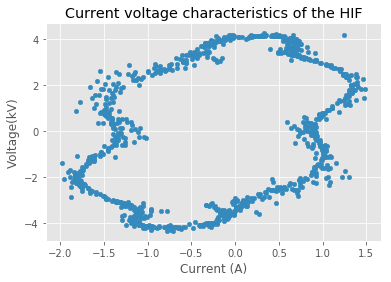

In [72]:
data.sample(1000).plot(kind='scatter', x='Current', y='Voltage')
plt.xlabel('Current (A)')
plt.ylabel('Voltage(kV)')
plt.title('Current voltage characteristics of the HIF')

Text(0.5,0,'Time(ms)')

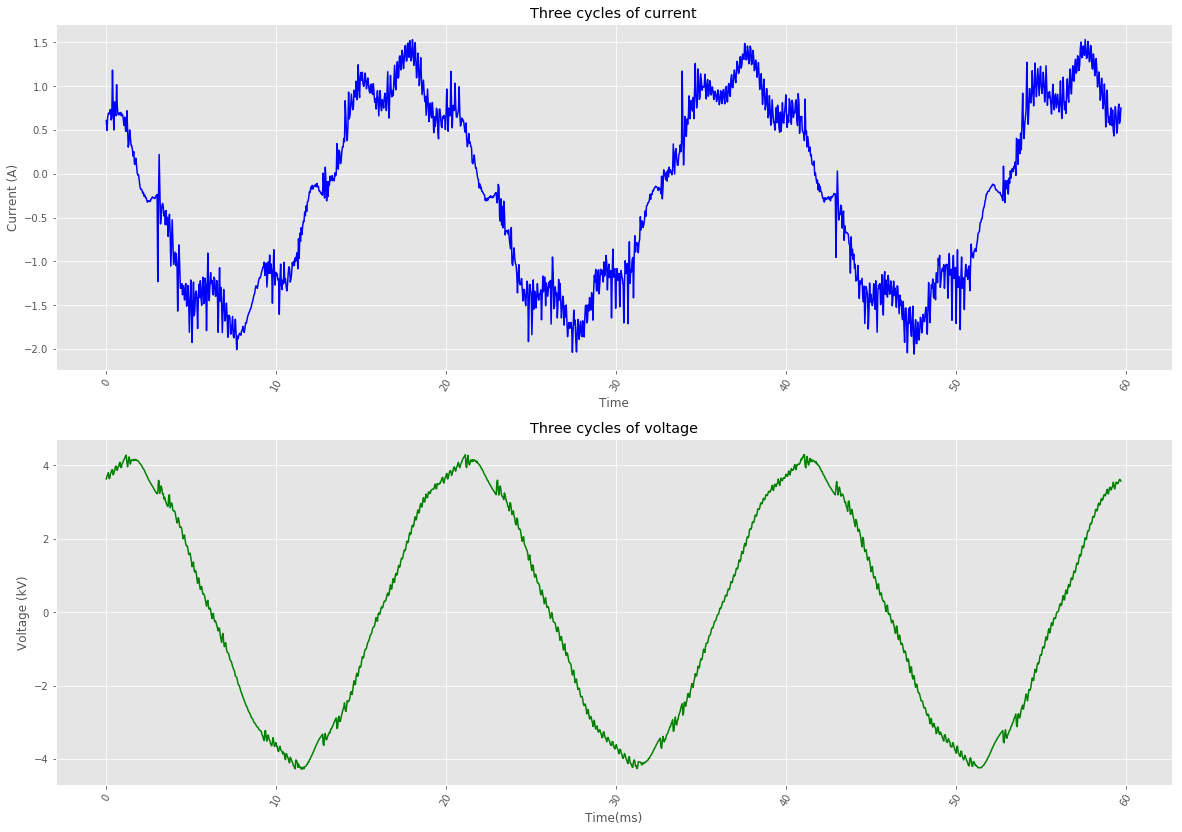

In [83]:
plt.figure(figsize=(20,14))

plt.subplot(211)
plt.title('Three cycles of current')
data.iloc[:3*493].Current.plot(color='b')
plt.xticks(rotation=60)
plt.ylabel('Current (A)')

plt.subplot(212)
plt.title('Three cycles of voltage')
data.iloc[:3*493].Voltage.plot(color='g')
plt.xticks(rotation=60)
plt.ylabel('Voltage (kV)')

plt.xlabel('Time(ms)')